## Modélisation de la survie d'un individu dans un milieu hostile.

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [24]:
def construction_abri(cap , source_inf , vegr , veg , s , jourres , abri):
    """float*bool*int*float*int*bool => bool*int*bool*bool"""
    #sauve:bool
    sauve = False
    #rand:float
    if jourres != 0:
        jourres = jourres - 1
    else:
        abri = True
    if jourres == -11 or vegr == 0:
        jourres = ((45/(cap*0.5)//10 * 1/(veg/5)))/1.
        abri = False
        source_inf = False
        rand = np.random.random_sample()
        if rand < s:
            sauve = True
    jourres = jourres//1

    return jourres , abri , sauve , source_inf

In [25]:
construction_abri(0.1,False,1,20,0.1,-10,False)

(22.0, False, False, False)

In [26]:
def trouver_eau(p_eau , capadap , source_inf , hydrat):
    """float*float*bool*float => bool*float"""
    b=0
    if source_inf == 1:
        hydrat = 1
    else:
        rand = np.random.random_sample()
        if rand <= 0.4*p_eau*(2.5*capadap):
            b=1
            hydrat = hydrat + 0.25
        elif rand <= p_eau*(5*capadap) :
            b=2
            hydrat = hydrat + 0.5
            rand=np.random.random_sample()
            if rand > 0.4:
                b=3
                source_inf = True
    if hydrat > 1:
        hydrat = 1
    return source_inf , hydrat,b

In [27]:
 def inter_veget(veg,alimentation,capadap,vegre):
    """int*float*float=>int*float"""
    #p_vg:float
    p_vg=0.6
    #trouve:bool
    trouve=True
    #vegr:int
    vegr=vegre
    if vegr == 0:
        vegr = veg
    while vegr>0 and trouve==True:
        rand=np.random.random_sample()
        if rand * capadap < p_vg:
            alimentation = alimentation + (0.08 * capadap)
            vegr = vegr - 1
            p_vg = p_vg-0.1
        else:
            trouve=False
    if alimentation > 1:
        alimentation = 1
    return alimentation , vegr

In [28]:

def inter_anim(p_a, p_ap, force, capadap, alimentation, sante,c):
    """
    float ^6 -> float ^2
    hyp : 
    """
    
    
    random1=np.random.random_sample()
    if random1 <= p_a : 
        random2 = np.random.random_sample()
        if random2 <= p_ap :
            alimentation,sante = inter_pred(force, capadap, alimentation, sante)
        else :
            alimentation = alimentation + 0.15
    if alimentation > 1:
        alimentation = 1.0
    
    if sante <= 0:
        sante = 0
        c = "Mort mangé par un prédateur"
        
    return alimentation , sante , c

In [29]:
def inter_pred(force, cap, alimentation, sante):
    """
    float * float * float * float -> float * float 
    hyp : random2 <= p_a
    rend le niveau d alimentation et de sante apres une rencontre avec un animal dangereux 
    """

    random4=np.random.random_sample()
    combat = random4*(force+0.5)*(cap+0.5)
    if combat <= 0.1 :
        sante = 0 
    elif combat <=0.4 :
        sante = sante - (1-force)*(1-cap)*0.5
    elif combat <= 0.7 : 
        sante =sante - (1-force)*(1-cap)*0.4
        alimentation = alimentation + 0.15 
    else :
        alimentation = alimentation + 0.15
    return alimentation, sante

In [30]:
def sante_fct_hydr_alim(alimentation,hydratation,sante,abri,force,c):
    """float³=>float
    force en fonction de l'alimentation et hydratation"""
    
    if abri==True:
        sante=sante+0.025
    
    if alimentation >= 0.7 and hydratation >=0.7:
        if sante<0.2:
            sante = 0.2
        else:
            sante = sante + 0.05
    elif alimentation>=0.5 and hydratation >=0.5:
        alimentation=alimentation
    elif alimentation<0.5 :
        if hydratation<0.5:
            sante = sante - ((0.5-alimentation)*0.7 + (0.5-hydratation)*0.9)
        else:
            sante = sante - (0.5-alimentation)*0.5
    else:
        sante = sante - (0.6-hydratation)
    if sante <=0:
        sante=0
        c="Mort d'épuisement"
    if sante > 1.0 :
        sante = 1.0
    
    if sante >=0.3 and force<=1.0:
        force=force+0.01
    elif force>=0.1:
        force=force-0.05
    
    
    hydratation=hydratation-0.3
    alimentation=alimentation-0.15
    if hydratation <= 0:
        hydratation =0
        c = "Mort de déshydratation"
        sante = 0
    if alimentation <= 0:
        alimentation = 0
        c = "Mort de faim"
        sante = 0
    return sante,alimentation,hydratation,force,c

In [31]:
def secouru(p_s, j,p_s_ini,p_s_10):
    """
    float * int -> bool 
    hyp :
    retourne si l agent est secouru par une equipe de secours
    """


    #secouru : bool
    secouru = False

    if j <= 10 :
        p_s = p_s + p_s_ini*0.2
    elif j <= 25 :
        p_s_10 = p_s
    else :
        p_s = p_s - p_s_10*0.2
    
    random5=np.random.random_sample()
    secouru = random5 <= p_s

    return secouru , p_s


In [32]:
secouru(0.008666657999999999,0,0.00666666,0)

(False, 0.009999989999999999)

In [33]:
#dictionnaire_agent:dict[str:tuple[float,float]]
dictionnaire_agent={}
dictionnaire_agent["professionnel"]=(0.8,0.9)
dictionnaire_agent["bureaucrate"]=(0.2,0.3)
dictionnaire_agent["moyen"]=(0.5,0.5)
dictionnaire_agent["Maxime"]=(0.1,0.1)

#dictionnaire_biome:dict[str:tuple[float,float,int,float,float,float]]
dictionnaire_biome={}
dictionnaire_biome["Amazonie"]=(0.65,0.75,33,0.7,0.03571428571,0.007142857142)
dictionnaire_biome["Alaska"]=(0.38,0.25,18,0.6,0.00043185564,0.0086371128)
dictionnaire_biome["France"]=(0.3,0.05,17,0.6,0.03,0.06)
dictionnaire_biome["Sahara"]=(0.25,0.5,1,0.1,0.00333333,0.00666666)

In [34]:
def nouveau_agent(nom,force,cap):
    """
    str * float^2 -> dict[str:tuple[float,float]]
    hyp: len(nom) >= 1 and force >0 and force <1 and cap >0 and cap <1
    retourne le dictionnaire des agents augmenté de l agent créé
    """
    dictionnaire_agent[nom]=(force,cap)
    return dictionnaire_agent


In [35]:
def nouveau_biome(nom,p_a,p_ap,veg,p_e,p_v,p_s):
    """
    str * float^6 -> dict[str:tuple[float,float,int,float,float,float]]
    hyp: len(nom) >= 1 and 0< p_a <1 and 0< p_ap <1 and 0< veg and 0< p_e <1 and 0< p_v <1 and 0< p_s <1
    retourne le dictionnaire des biomes augmenté du biome créé
    """
    dictionnaire_biome[nom]=(p_a,p_ap,veg,p_e,p_v,p_s)

In [571]:
nouveau_agent("Timotuc",2,2)

{'Adrien': (0.3, 0.5),
 'Maxime': (0.1, 0.1),
 'Nicolas': (0.3, 0.8),
 'Timotuc': (2, 2),
 'bureaucrate': (0.2, 0.3),
 'moyen': (0.5, 0.5),
 'professionnel': (0.8, 0.9)}

In [105]:


def simulation_survie(agent,biome):
    """str*str*dict[str:tuple[float,float]]*dict[str:tuple[float,float,int,float,float,float]]"""
    
    #c : cause de la fin
    c = ""
    #j : compteur jour
    j = 0
    #jour_r:float
    jour_r=-10
    #abri:bool
    abri=False
    #sauve:bool
    sauve=False
    #sourceinf:bool
    source_inf=False
    #sante:float
    sante=1.0
    #hydrat:float
    hydrat=1.0
    #alimentation:float
    alimentation=1.0
    #Lsante:list[float]
    Lsante=[]
    Leau=[]
    
    force , capadap = dictionnaire_agent[agent]
    p_a , p_ap , veg , p_e , p_v , p_s = dictionnaire_biome[biome]
    vegr=veg
    p_s_ini = p_s
    p_s_10=p_s
    while sante > 0 and sauve != True:
        jour_r , abri , sauve , source_inf = construction_abri(capadap , source_inf , vegr , veg , p_v , jour_r , abri)
        
        sourceinf , hydrat ,b = trouver_eau(p_e , capadap , source_inf , hydrat)
        
        alimentation , sante , c  = inter_anim(p_a, p_ap, force, capadap, alimentation, sante, c)
        
        if c != "":
            print(model(j,Lsante),Lsante)
            return j, c,sante
        
        alimentation , vegr = inter_veget(veg,alimentation,capadap,vegr)
        
        sante , alimentation , hydrat , force , c = sante_fct_hydr_alim(alimentation, hydrat, sante,abri,force,c)
        
        sauve , p_s = secouru (p_s,j,p_s_ini,p_s_10)
        
        Lsante.append(sante)
        Leau.append(hydrat)
        #Définition de la capacité de survie a x jour
        
        if j==10:
            p_s_10 = p_s
        
        #Augmentation de la capacité d'adaptation
        if capadap<1.0:
            capadap=capadap+0.01
       
        
        j=j+1
    print(model(j,Lsante),Lsante)
    if sauve==True:
        c="Sauvé!"
    return j, c,sante




None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7499999999999998, 0.7499999999999998, 0]


(11, 'Mort de déshydratation', 0)

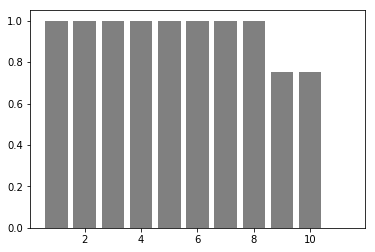

In [106]:
simulation_survie("professionnel","Sahara")

In [108]:
def test(a,b,c):
    comp=0
    while a!=0:
        aa,ab,ah=simulation_survie(b,c)
        if ah!=0:
            comp=comp+1
        a=a-1
    return simulation_survie(b,c),comp

None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9249999999999996, 0.7999999999999993, 0.6249999999999989, 0.6499999999999989, 0.724999999999999, 0.799999999999999, 0.8749999999999991, 0.9499999999999992, 1.0, 1.0, 1.0]
None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9899999999999998, 0.9449999999999995, 0.9699999999999995, 0.9299999999999994, 0.8149999999999993, 0.6999999999999991, 0.5849999999999989, 0.4699999999999987, 0.35999999999999854]
None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9599999999999997, 0.9599999999999996, 0.8849999999999996, 0]
None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
None [1.0]
None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
None [1.0, 1.0, 1.0]
None [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

((11, 'Mort mangé par un prédateur', 0), 4)

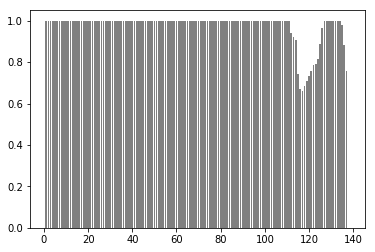

In [109]:
test(30,"professionnel","Amazonie")

In [589]:
def model(jour,Lsante):
    """int*list[float]"""
    Ljour=[]
    for i in range(0,jour):
        Ljour.append(i+1)
    plt.bar(Ljour,Lsante , color='green' )
   

In [230]:
def carto(chanzon,mat,nbdep):
    
    #i:int
    #j:int
    borne=10
    ha,ga,ba,da=True,True,True,True
    suii=0
    suij=0
    nbdep=nbdep+1
    for i in range(0,borne+1):
        for j in range(0,borne+1):
            if mat[i,j]==1:
                poshj=j
                poshi=i
            if mat[i,j]==-1:
                pospi=i
                pospj=j
    borpi=2
    borpj=2
    if pospi==borne:
        borpi=1
    if pospj==borne:
        borpj=1
    borhi=2
    borhj=2
    if poshi==borne:
        borhi=1
    if poshj==borne:
        borhj=1
    if chanzon == True:
        a=0
        while a==0:
            n=(np.random.random_sample()*8)//2
            if n>=2.9 and n<=3.1 and poshj!=0:
                if mat[poshi,poshj-1]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi,poshj-1]=1
                    a=1
            elif n>=1.9 and n<=2.1 and poshi!=borne :
                if mat[poshi+1,poshj]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi+1,poshj]=1
                    a=1
            elif n>=0.9 and n<=1.1 and poshj!=borne:
                if mat[poshi,poshj+1]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi,poshj+1]=1
                    a=1
            elif n>=-0.1 and n<=0.1 and poshi!=0:
                if mat[poshi-1,poshj]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi-1,poshj]=1
                    a=1
            
            if poshi!=0:
                if mat[poshi-1,poshj]>0 or mat[poshi-1,poshj]==-3:
                    ha=False
            else:
                ha=False
            if poshj!=0:
                if mat[poshi,poshj-1]>0 or mat[poshi,poshj-1]==-3:
                    ga=False
            else:
                ga=False
            if poshj!=borne:
                if mat[poshi,poshj+1]>0 or mat[poshi,poshj+1]==-3:
                    da=False
            else:
                da=False
            if poshi!=borne:
                if mat[poshi+1,poshj]>0 or mat[poshi+1,poshj]==-3:
                    ba=False
            else:
                ba=False
                
            if ba==False and ha==False and da==False and ga==False:
                suivi=10000
                for i in range(poshi-1,poshi+borhi):
                    for j in range(poshj-1,poshj+borhj):
                        if mat[i,j]<suivi and i>=0 and i<=borne and j<=borne and j>=0 and mat[i,j]!=1:
                            suivi=mat[i,j]
                            suii=i
                            suij=j
                mat[poshi,poshj]=nbdep
                mat[suii,suij]=1
                a=1
    
    


        suivi=0
        traque=False
        combat=False
        
        for i in range(pospi-1,pospi+borpi):
            for j in range(pospj-1,pospj+borpj):
                if mat[i,j]!=0 and mat[i,j]!=-1 :
                    print(i,j)
                    if i>=0 and i<=borne and j<=borne and j>=0:
                        traque=True
                        if mat[i,j]==1:
                            combat= True
                        elif mat[i,j]>suivi:
                            suivi=mat[i,j]
                            suii=i
                            suij=j
                            visite=True
                if mat[i,j]==1 and i>=0 and i<=borne and j<=borne and j>=0:
                    combat= True
                    mat[i,j]=100000
        if traque==True and combat==False:
            if visite==True:
                mat[pospi,pospj]=-3
            else:
                mat[pospi,pospj]=0
            pospi=suii
            pospj=suij
            mat[pospi,pospj]=-1
        if traque==False and combat==False:
            a=0
            while a==0:
                n=(np.random.random_sample()*8)//2
                if n>=3 and pospj!=0 :

                    mat[pospi,pospj]=0
                    mat[pospi,pospj-1]=-1
                    a=1
                elif n>=2 and pospi!=borne :

                    mat[pospi,pospj]=0
                    mat[pospi+1,pospj]=-1
                    a=1
                elif n>=1 and pospj!=borne:

                    mat[pospi,pospj]=0
                    mat[pospi,pospj+1]=-1
                    a=1
                elif n>=0 and pospi!=0 :

                    mat[pospi,pospj]=0
                    mat[pospi-1,pospj]=-1
                    a=1
        for i in range (0,borne+1):
            for j in range(0,borne+1):
                if mat[i,j]>1 and mat[i,j]<nbdep-15:
                    mat[i,j]=-3
    model(mat)
    return mat
        

In [568]:
carto(True, a,34)

5 8
5 10
6 8


array([[ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  2.2e+01,
         2.3e+01,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         2.4e+01,  0.0e+00,  3.4e+01, -1.0e+00,  3.2e+01],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  3.5e+01,  1.0e+05,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         2.6e+01,  0.0e+00,  0.0e+00,  0.0e

In [216]:
a=np.zeros((11,11))

a[5,5]=-1
a[6,6]=25
a[5,6]=24
a[4,6]=23
a[4,5]=22
a[7,6]=26
a[7,7]=27
a[7,8]=28
a[7,9]=1
print(a)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 22. 23.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1. 24.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 25.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 26. 27. 28.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [219]:
(np.random.random_sample()*8)//2

2.0

In [434]:
b=1
while b<=30:
    print(carto(True,a,b))
    b=b+1


10
[[22.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
9
[[22. 23.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import colors


def random_initial_state(n_cells=100, n_generations=100):
    first_row = np.random.random_integers(1, 2, size=(1, n_cells))
    spacetime = np.zeros(shape=(n_generations, n_cells))
    spacetime[0] = first_row

    return spacetime


def initialize(n_cells=0, n_generations=100, rule={}):
        initial_state = random_initial_state(n_cells, n_generations)

        cmap = colors.ListedColormap(['white', 'blue', 'grey'])
        bounds = [0, 1, 2, 2]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        print(cmap,bounds,norm)

        fig = plt.figure()

        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

        grid = plt.imshow(initial_state, interpolation='nearest', cmap=cmap,
                          norm=norm)

        ani = animation.FuncAnimation(fig, next_generation,
                                      fargs=(grid, initial_state, rule),
                                      frames=n_generations - 1,
                                      interval=50,
                                      blit=False)

        plt.show()


def next_generation(i, grid, initial_state, rule):
    current_generation = initial_state[i]
    new_state = initial_state.copy()

    new_generation = process(current_generation, rule)

    new_state[i + 1] = new_generation

    grid.set_data(new_state)
    initial_state[:] = new_state[:]

    return grid,


def process(generation, rule):
    new_generation = []

    for i, cell in enumerate(generation):
        neighbours = []
        if i == 0:
            neighbours = [generation[len(generation) - 1], cell, generation[1]]
        elif i == len(generation) - 1:
            neighbours = [generation[len(generation) - 2], cell, generation[0]]
        else:
            neighbours = [generation[i - 1], cell, generation[i + 1]]

        new_generation.append(rule[tuple(neighbours)])

    return new_generation


def generate_rule(rule):
    rule_str = format(rule, '#010b')[2:]

    rule = {
        (2, 2, 2): int(rule_str[0]) + 1,
        (2, 2, 1): int(rule_str[1]) + 1,
        (2, 1, 2): int(rule_str[2]) + 1,
        (2, 1, 1): int(rule_str[3]) + 1,
        (1, 2, 2): int(rule_str[4]) + 1,
        (1, 2, 1): int(rule_str[5]) + 1,
        (1, 1, 2): int(rule_str[6]) + 1,
        (1, 1, 1): int(rule_str[7]) + 1
    }

    return rule


def main():
    n_cells = int(input("Number of cells: "))
    n_generations = int(input("Number of generations: "))
    rule = int(input("Rule number: "))
    rule = generate_rule(rule)
    initial_state = initialize(n_cells, n_generations, rule)

if __name__ == '__main__':
    main()

Number of cells: 121
Number of generations: 11
Rule number: 1


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 2 + 1) instead
  if __name__ == '__main__':


ValueError: could not broadcast input array from shape (121) into shape (3)

In [196]:
format(2,"#008b")


'0b000010'

In [228]:
def model(mat):
    cmap = colors.ListedColormap(['purple','red', 'white', 'black','green'])
    bounds = [-3,-1, 0, 1, 2,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    print(cmap,bounds,norm)

    fig = plt.figure()

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    grid = plt.imshow(mat, interpolation='nearest', cmap=cmap,
                          norm=norm)

    
    
    plt.show()

4 5
4 6
5 6
6 6
<matplotlib.colors.ListedColormap object at 0x7fe68b6cb0f0> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b6cb240>


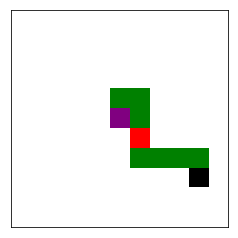

5 5
5 6
7 6
7 7
<matplotlib.colors.ListedColormap object at 0x7fe68b621d68> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68ad245f8>


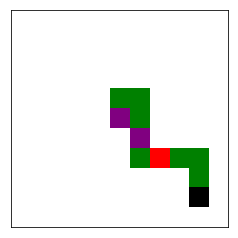

6 6
7 6
7 8
<matplotlib.colors.ListedColormap object at 0x7fe68b642e10> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b642b70>


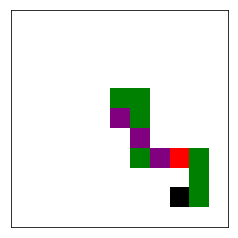

7 7
7 9
8 9
<matplotlib.colors.ListedColormap object at 0x7fe68b4cbf28> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b4cb3c8>


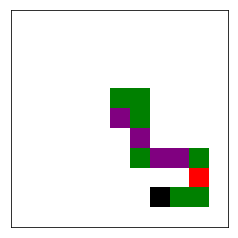

7 8
7 9
9 8
9 9
<matplotlib.colors.ListedColormap object at 0x7fe68b6e0128> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b6e0fd0>


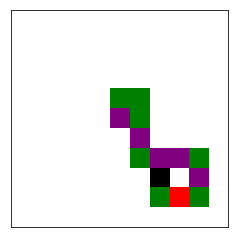

8 7
8 9
9 7
9 9
<matplotlib.colors.ListedColormap object at 0x7fe68b690358> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b690128>


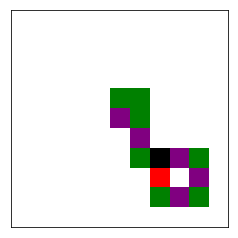

7 6
7 7
7 8
9 7
9 8
<matplotlib.colors.ListedColormap object at 0x7fe68ae21e10> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68ae216a0>


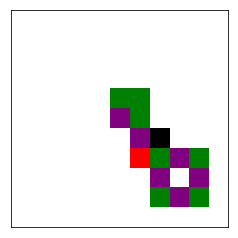

6 6
6 7
7 7
8 7
<matplotlib.colors.ListedColormap object at 0x7fe68b5784e0> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b578630>


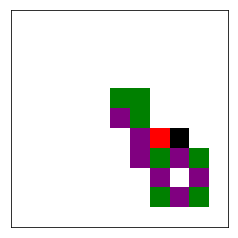

5 6
5 8
6 6
6 8
7 6
7 7
7 8
<matplotlib.colors.ListedColormap object at 0x7fe68b63ba90> [-3, -1, 0, 1, 2, 3] <matplotlib.colors.BoundaryNorm object at 0x7fe68b63b1d0>


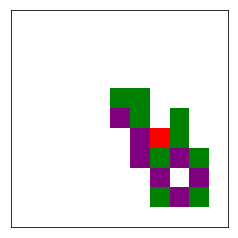

UnboundLocalError: local variable 'poshi' referenced before assignment

In [231]:
b=0
while b<10:
    b=b+1
    a=carto(True,a,b)
    time.sleep(5)